=== THERMAL STORAGE MODEL ===



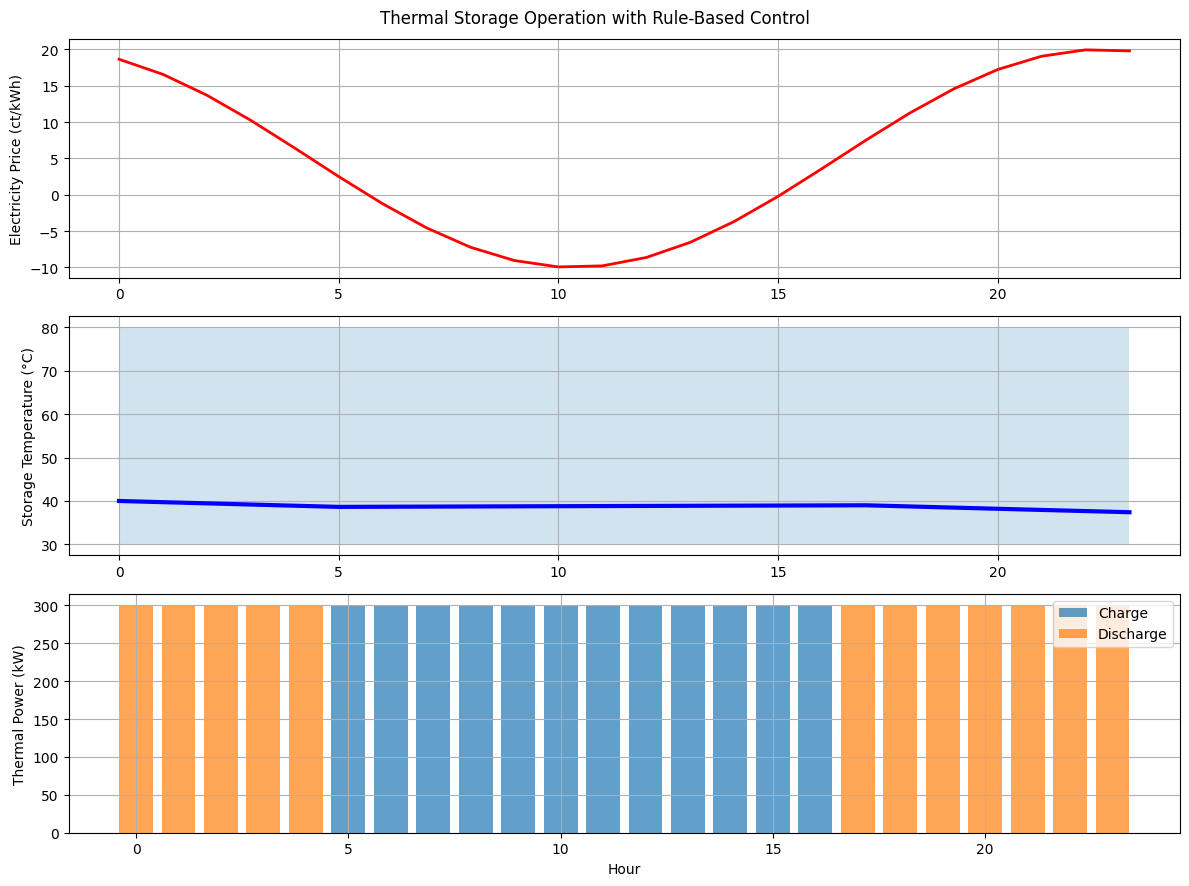

Analysis complete.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

print("=== THERMAL STORAGE MODEL ===\n")

# Time horizon
hours = np.arange(24)

# Storage parameters
T_init = 40          # °C
T_min, T_max = 30, 80
Q_max = 500           # kW
UA = 10               # kW/K (heat loss coefficient)
C_th = 2000           # kWh/K (thermal capacity)
T_env = 15            # °C

# Simple electricity price signal (for rule-based logic)
price = 0.05 + 0.15*np.sin(2*np.pi*hours/24 + 2)

# Initialize
T = np.zeros(25)
T[0] = T_init
Q_charge = np.zeros(24)
Q_discharge = np.zeros(24)

# Rule-based control logic
for k in range(24):
    if price[k] < np.mean(price) and T[k] < T_max:
        Q_charge[k] = Q_max * 0.6
    elif price[k] > np.mean(price) and T[k] > T_min:
        Q_discharge[k] = Q_max * 0.6

    losses = UA * (T[k] - T_env)
    T[k+1] = T[k] + (Q_charge[k] - Q_discharge[k] - losses) / C_th

# Plot results
fig, axs = plt.subplots(3,1, figsize=(12,9))

axs[0].plot(hours, price*100, 'r-', linewidth=2)
axs[0].set_ylabel('Electricity Price (ct/kWh)')
axs[0].grid(True)

axs[1].plot(hours, T[:-1], 'b-', linewidth=3)
axs[1].fill_between(hours, T_min, T_max, alpha=0.2)
axs[1].set_ylabel('Storage Temperature (°C)')
axs[1].grid(True)

axs[2].bar(hours, Q_charge, label='Charge', alpha=0.7)
axs[2].bar(hours, Q_discharge, label='Discharge', alpha=0.7)
axs[2].set_ylabel('Thermal Power (kW)')
axs[2].set_xlabel('Hour')
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Thermal Storage Operation with Rule-Based Control")
plt.tight_layout()
plt.savefig("thermal_storage_model.png", dpi=300)
plt.show()

print("Analysis complete.")
